In [1]:
import sys
sys.path.append('d:\\QUANT_GAME\\python_game\\factor\\factor_lab\\analyze_note')
from analyze_factor_note_init import AnalyzeFactorNotes as Note

---

### 初始化条件

In [2]:
factor_name = 'magnetic_field'
start_date = 20100101
end_date = 20210101
med_tf = False
z_score_tf = False
demean_tf = False
sample_num = None
sample_every_date_tf = False

In [3]:
note = Note(factor_name, start_date, end_date,
                med_tf, z_score_tf, demean_tf,
                sample_num,sample_every_date_tf
            )

#### 加载数据

In [4]:
note.load_data()

---

#### 查看因子相关信息

##### - 因子定义及计算公式

因子名称：磁场因子（magnetic_field）   
因子定义：根据之前定义的电流因子来计算磁场因子，其中电流因子的默认参数为   
电压因子=时间窗口$\delta_t$内收益序列r的均值   
电阻因子=时间窗口$\delta_t$内收益序列r的标准差。   
磁场因子的计算公式为：
$$
current_t = \frac{voltage_t}{resistance_t} =    
\frac{r_t - mean(r_{t-\delta_t+1},r_{t-\delta_t+2},\cdots,r_{t})}{std(r_{t-\delta_t+1},r_{t-\delta_t+2},\cdots,r_{t})}
$$
$$
factor_t = \frac{current_t}{current_{t-1}} - 1
$$
$$

#### -因子信息

In [5]:
factor_info = note.get_factor_info()
for k,v in factor_info.items():
    print(k,':',v)

name : magnetic_field
fields : ['close']
other_dIepend_factors : ['current']
calc_params : {'delta_period': 20}
save_h5_path : F:\factor_lab_res\prepared_data\factor_data.h5
value_range : [-7.294256093242349, 7.530661437191499]
process_suggest_method : None


---

### 因子分析

In [6]:
note.get_data_for_analysis()

In [7]:
zy_fa = note.analysis_factor()

#### 绘制factor-return散点图

- 全部数据

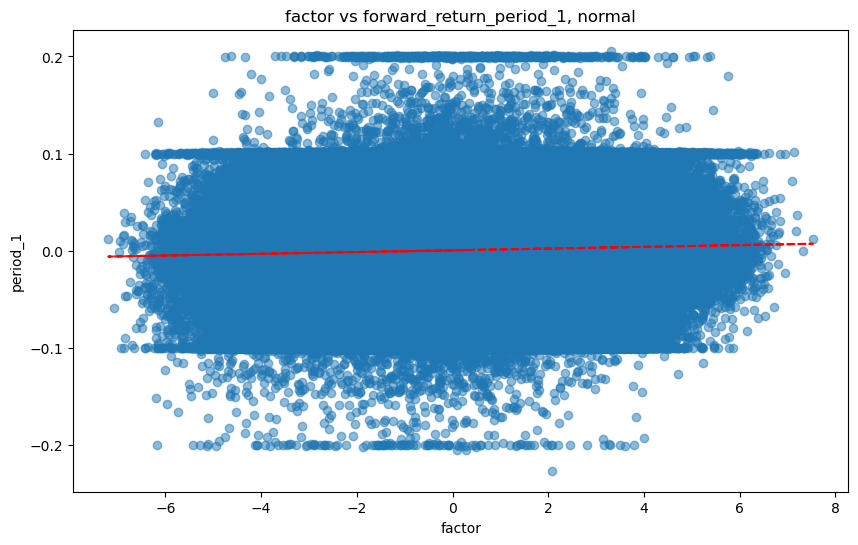

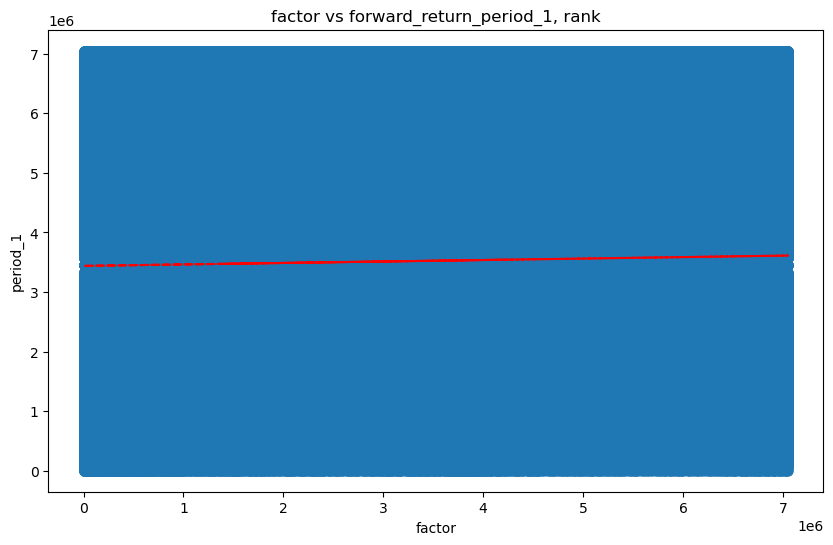

In [8]:
# normal
zy_fa.plot_scatter_and_regression(periods_list=[1,],sample_num=None)
# rank
zy_fa.plot_scatter_and_regression(periods_list=[1,],rank_tf=True,sample_num=None)

- 抽样100000

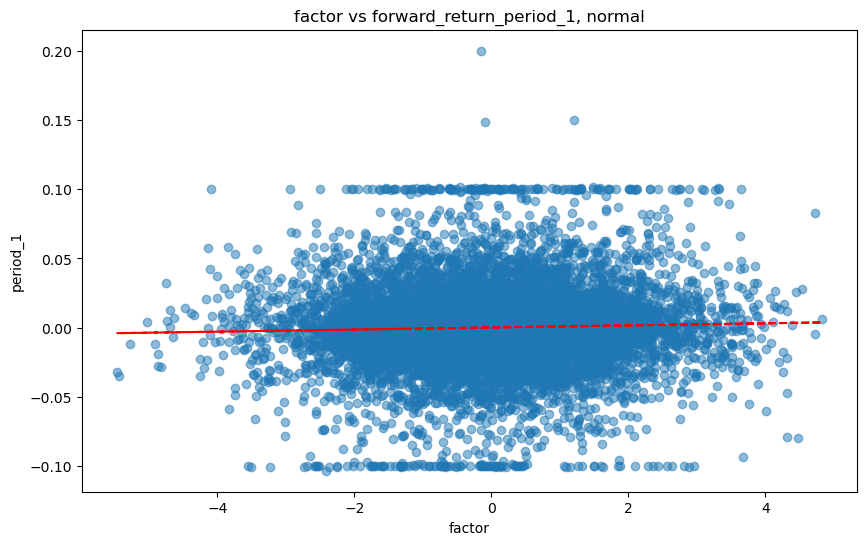

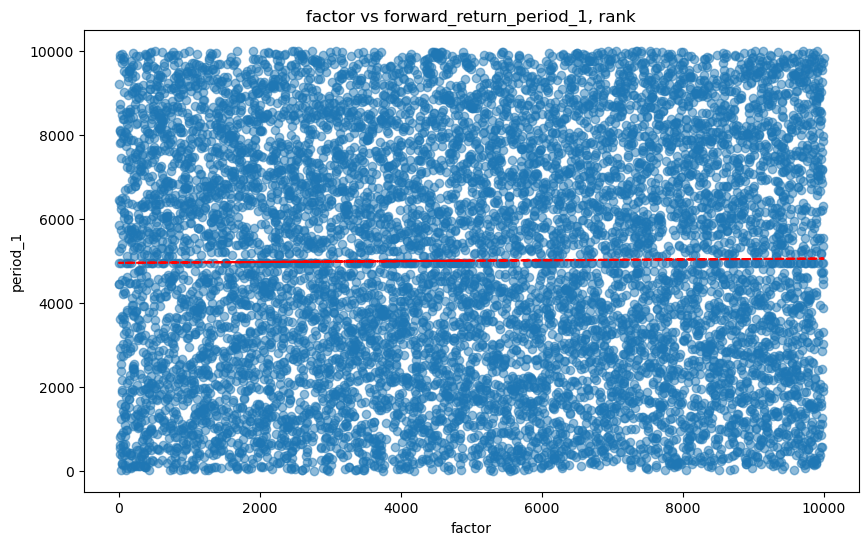

In [9]:
# normal
zy_fa.plot_scatter_and_regression(periods_list=[1,],sample_num=10000)
# rank
zy_fa.plot_scatter_and_regression(periods_list=[1,],rank_tf=True,sample_num=10000)

### 绘制因子分布图

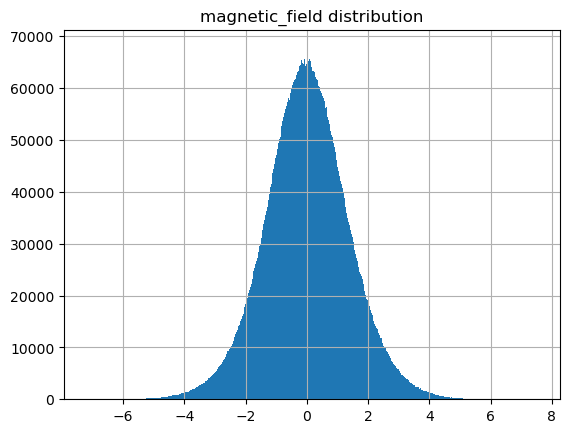

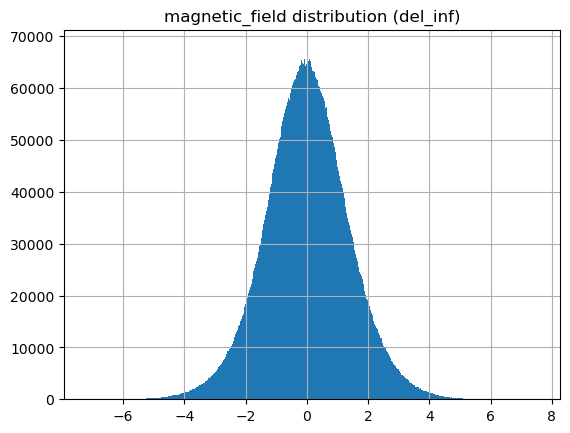

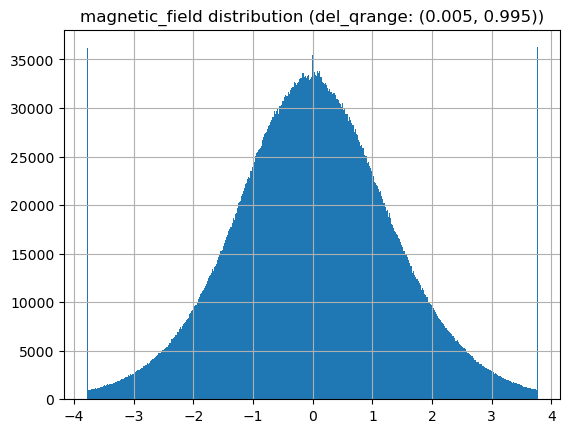

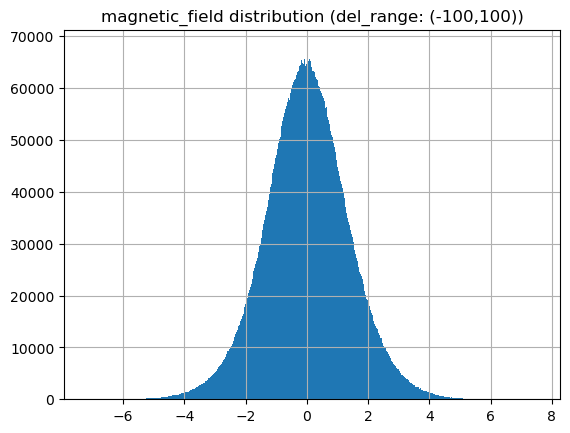

In [10]:
# 原始因子分布图
zy_fa.plot_factor_hist()
# 剔除inf后的因子分布图
zy_fa.plot_factor_hist(del_inf=True)
# 截取分位数qrange的因子分布图
zy_fa.plot_factor_hist(del_qrange=(0.005,0.995))
# 截取给定range的因子分布图
zy_fa.plot_factor_hist(del_range=(-100,100))

---

#### IC

#### 打印因子ic分析结果

In [11]:
analyze_ic_res = zy_fa.analyze_ic_res()
print('analyze_ic_res:\n',analyze_ic_res)


analyze_ic_res:
                       period_1  period_2  period_3  period_5  period_8  \
norm_ic_mean          0.037406  0.021765  0.017977   0.01497  0.009588   
norm_ic_std           0.094735  0.092477  0.091692    0.0889  0.080084   
norm_ic_0.02_percent  0.826851  0.813388  0.808901  0.795812   0.76926   
norm_ic_t                  NaN       NaN       NaN       NaN       NaN   
norm_ir               0.394851  0.235355  0.196063  0.168394  0.119724   
norm_abs_ic           0.041333  0.020768  0.021511  0.019541  0.011024   
rank_ic_mean          0.013853  0.002581  0.001897  0.001252 -0.001676   
rank_ic_std           0.111571  0.107513  0.106444  0.104467   0.09578   
rank_ic_0.02_percent  0.835453   0.84368  0.850411  0.839566  0.807031   
rank_ic_t                  NaN       NaN       NaN       NaN       NaN   
rank_ir               0.124165  0.024002  0.017826  0.011989 -0.017495   
rank_abs_ic           0.024616   0.00723  0.014469  0.012421  0.002634   

                    

---

#### 绘制norm_ic的时序图

<Figure size 640x480 with 0 Axes>

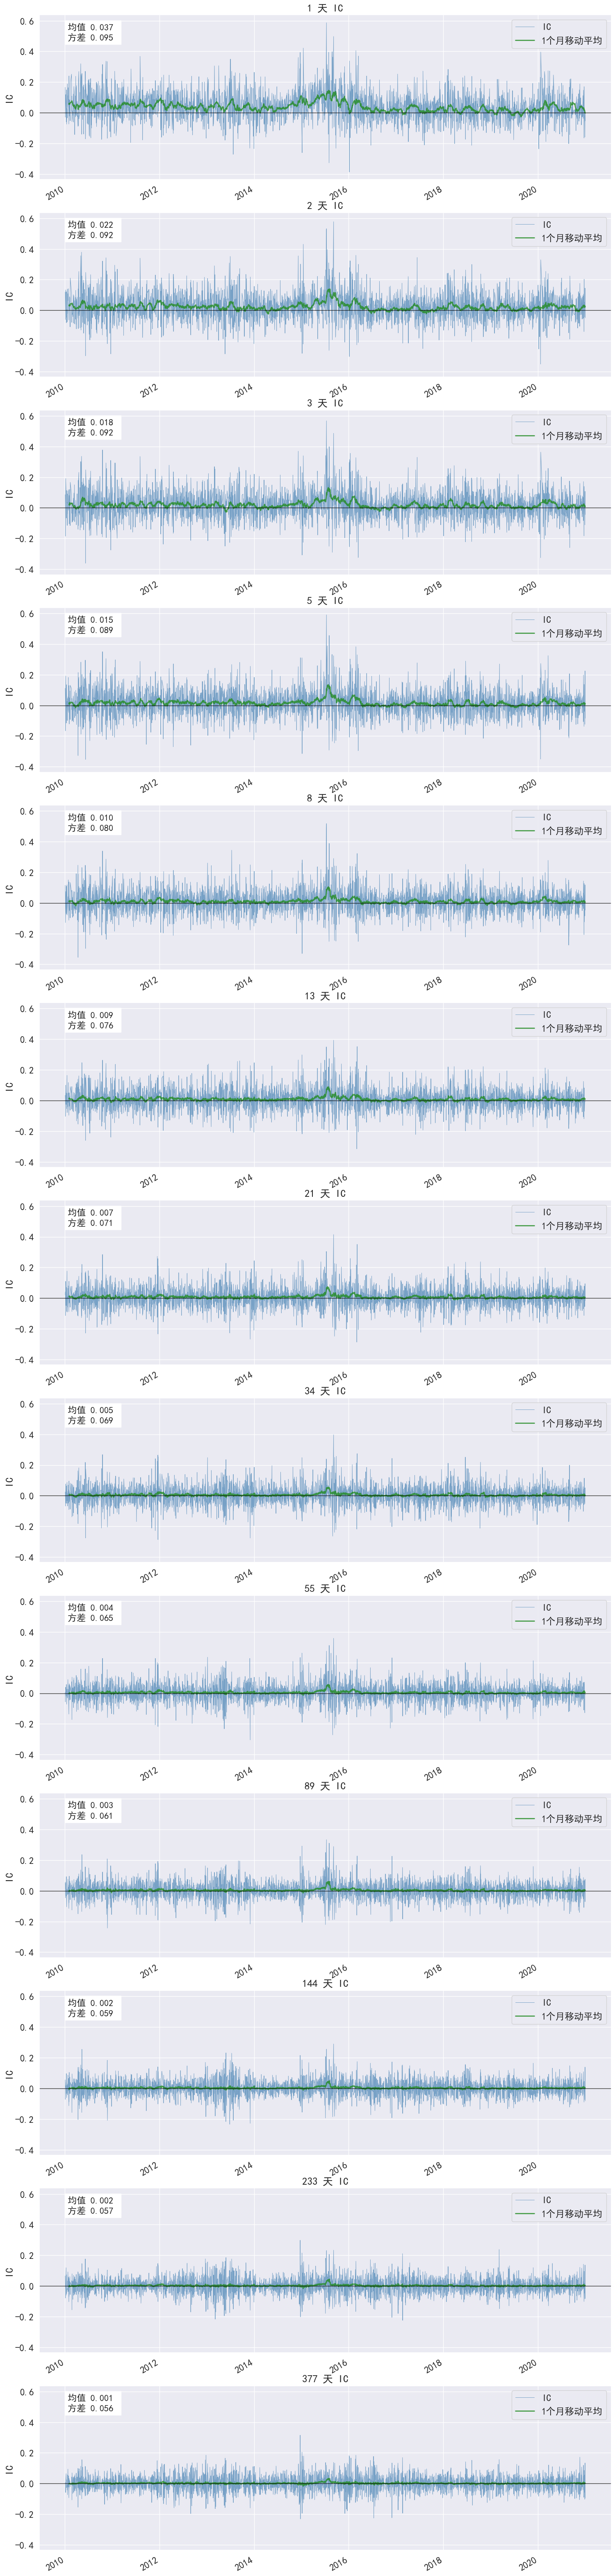

In [12]:
zy_fa.plot_norm_ic_ts()

---

#### 绘制rank_ic的时序图

<Figure size 640x480 with 0 Axes>

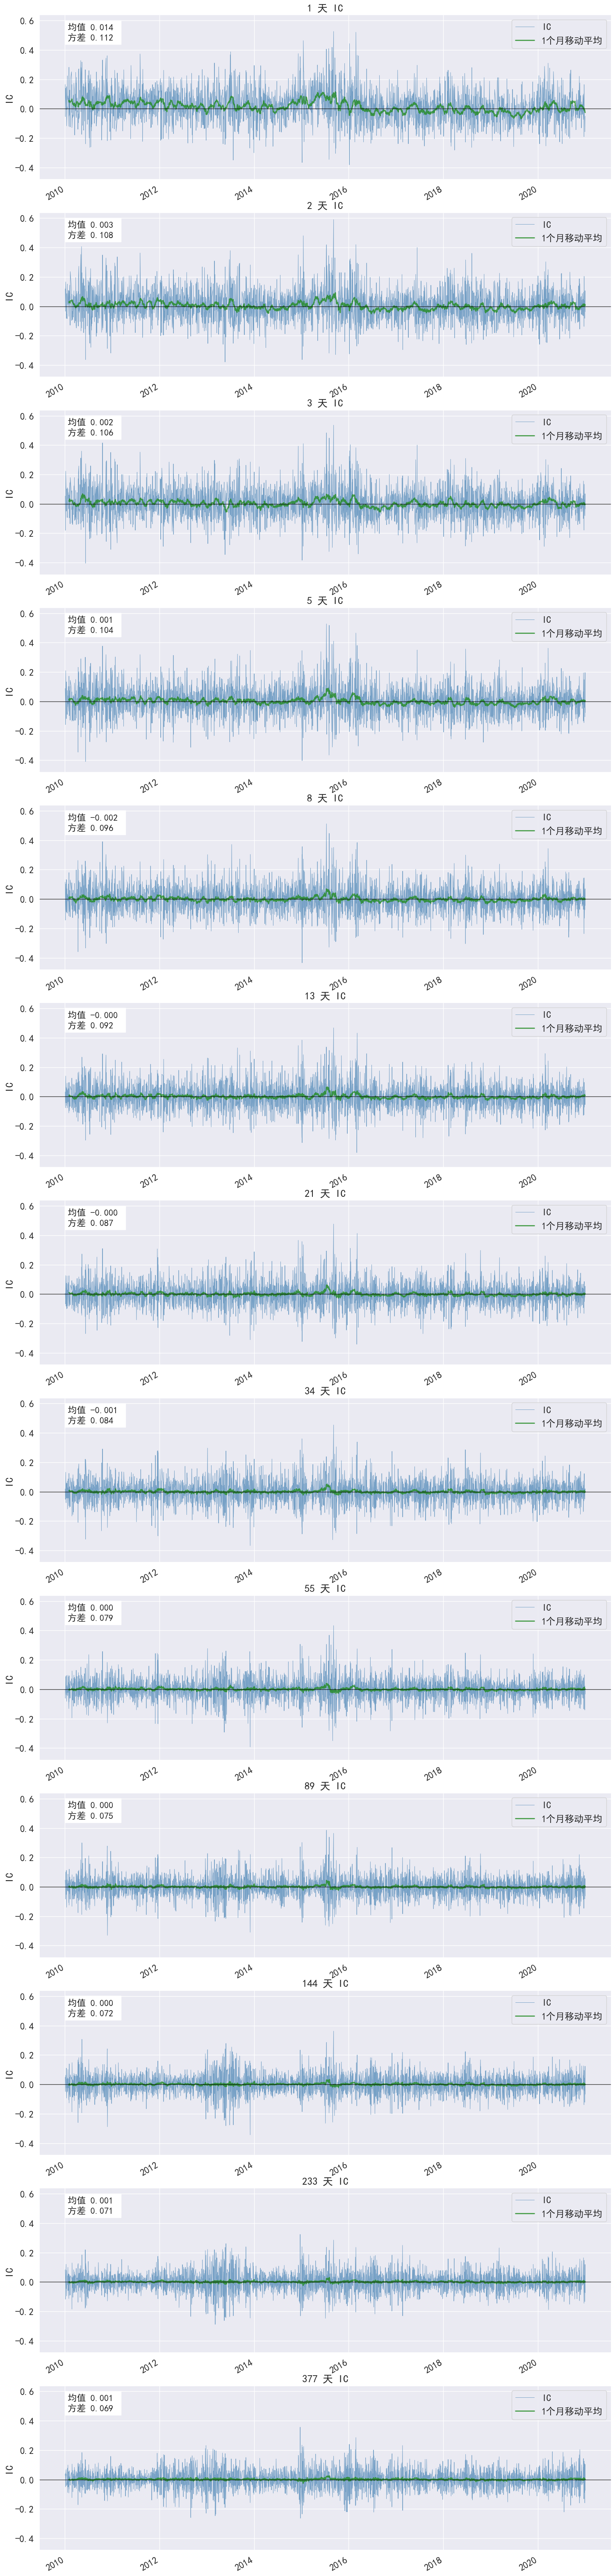

In [13]:
zy_fa.plot_rank_ic_ts()